In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
def extract_err_arr(pth):
    d = json.load(open(pth, "r"))
    return {
        "num_epochs": len(d),
        "err_train": [dd["err_train"] for dd in d],
        "err_test": [dd["err_test"] for dd in d],
        "err_ood": [dd["err_ood"] for dd in d],
    }

In [30]:
def phase_transition_heatmap(acc_list, pool_size_list, name_list, save_to=None):
    fig, axs = plt.subplots(1, len(acc_list), figsize=(len(acc_list) * 4, 4))
    for i, ax in enumerate(axs):
        data = acc_list[i]
        num_epochs = data.shape[1]
        num_pools = len(pool_size_list)
        sns.heatmap(
            data,
            yticklabels=pool_size_list,
            vmin=0,
            vmax=1,
            ax=ax,
        )
        ax.set_xlabel("Training steps", weight="bold")
        ax.set_ylabel("Pool size", weight="bold")
        ax.set_xticks(np.arange(0, num_epochs + 1, step=num_epochs // 10))
        xticklabels = [str(int(a/1000))+'K' for a in np.arange(0, num_epochs + 1, step=num_epochs // 10)]
        ax.set_xticklabels(xticklabels)
        ax.set_yticks(np.arange(0, num_pools, step=5))
        ax.set_yticklabels([pool_size_list[i] for i in np.arange(0, num_pools, step=5)])
        ax.set_title(name_list[i], weight="bold")
        # ax.tick_params(axis="x", labelrotation=45)
        # ax.tick_params(axis="y", labelrotation=45)
    fig.tight_layout()
    if save_to is not None:
        plt.savefig(save_to)
    
    plt.show()



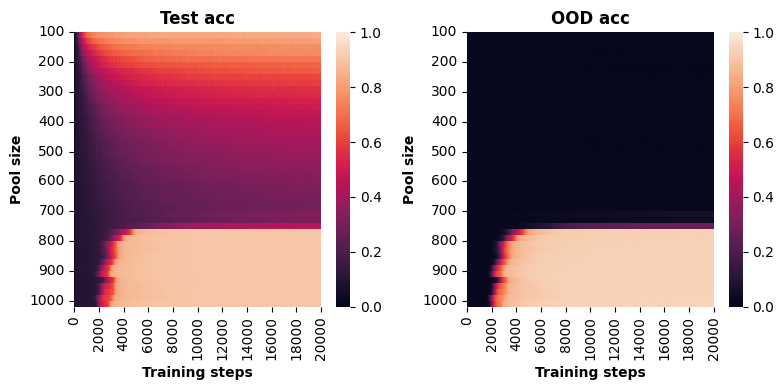

<Figure size 640x480 with 0 Axes>

In [31]:
# coarse scale
num_step = 20000
pool_size_list = np.arange(100, 1001, step=20)

err_train = np.zeros((len(pool_size_list), num_step))
err_test = np.zeros((len(pool_size_list), num_step))
err_ood = np.zeros((len(pool_size_list), num_step))

for i, pool_size in enumerate(pool_size_list):
    filename = f"2_layer_vocab_64_{pool_size}_20k"

    d = extract_err_arr(os.path.join(filename, "err_arr.json"))

    err_train[i] = d["err_train"]
    err_test[i] = d["err_test"]
    err_ood[i] = d["err_ood"]

phase_transition_heatmap(
    [1 - err_test, 1 - err_ood],
    pool_size_list,
    ["ID test acc", "OOD acc"],
    save_to="phase_transition_heatmap.png"
)